In [1]:
# --- 1. IMPORT LIBRARIES ---

# For data handling
import pandas as pd

# For connecting to your database
import mysql.connector

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# To help find your ds_helper library
import sys
import os

print("All libraries imported successfully.")

All libraries imported successfully.


In [2]:
# --- 2. CONNECT TO DATABASE & IMPORT DATA ---

# Try to connect to your database
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="joshika",  # <-- !! REPLACE THIS !!
        database="student_db"
    )
    print("✅ Database connection successful!")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    print("❌ Connection failed. Check your password and if MySQL is running.")




✅ Database connection successful!


In [3]:
# Write the master SQL query to get all data
query = """
SELECT
    a.attendance_percent,
    g.final_mark,
    g.pass_fail
FROM Students s
JOIN Grades g ON s.student_id = g.student_id
JOIN Attendance a ON s.student_id = a.student_id;
"""

# Use pandas to run the query and load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()
print("Database connection closed.")

# Display the first 5 rows to verify
print("\nData imported successfully:")
print(df.head())

Database connection closed.

Data imported successfully:
   attendance_percent  final_mark pass_fail
0                  92          85      Pass
1                  60          45      Fail
2                  85          72      Pass
3                  55          38      Fail
4                  98          92      Pass


C:\Users\joshika\AppData\Local\Temp\ipykernel_18944\2385842090.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [4]:
# --- 3. PREPROCESS DATA ---

# The ML model needs numbers. We map 'Pass' to 1 and 'Fail' to 0.
df['pass_fail'] = df['pass_fail'].map({'Pass': 1, 'Fail': 0})

print("Data preprocessed (Pass=1, Fail=0):")
print(df.head())

Data preprocessed (Pass=1, Fail=0):
   attendance_percent  final_mark  pass_fail
0                  92          85          1
1                  60          45          0
2                  85          72          1
3                  55          38          0
4                  98          92          1


In [5]:
# --- 4. BUILD & TRAIN MACHINE LEARNING MODEL ---

# 1. Define your "features" (the inputs) and your "target" (the output)
# We will use 'attendance' and 'marks' to predict 'pass_fail'
features = ['attendance_percent', 'final_mark']
target = 'pass_fail'

X = df[features]
y = df[target]

# 2. Split your data (we have 10 rows, so we'll use 3 for testing)
# test_size=0.3 means 30% of the data (3 rows) is saved for testing
# random_state=42 just ensures you get the same "random" split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the Logistic Regression model
model = LogisticRegression()

# 4. Train the model using your training data
model.fit(X_train, y_train)

print("✅ Model trained successfully.")

✅ Model trained successfully.


In [6]:
# --- 5. EVALUATE THE MODEL ---

# 1. Use the trained model to make predictions on the 3 test rows
y_pred = model.predict(X_test)

# 2. Compare the model's predictions (y_pred) to the actual answers (y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"--- Model Evaluation ---")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 3. Let's test it on a new, imaginary student
# What would it predict for a student with 70% attendance and a 60 mark?
new_student_data = [[70, 60]] 
prediction = model.predict(new_student_data)

print(f"\nPrediction for new student (70% att, 60 mark): {'Pass' if prediction[0] == 1 else 'Fail'}")

--- Model Evaluation ---
Model Accuracy: 100.00%

Prediction for new student (70% att, 60 mark): Pass


C:\Users\joshika\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



--- Visualization: Attendance vs. Marks ---


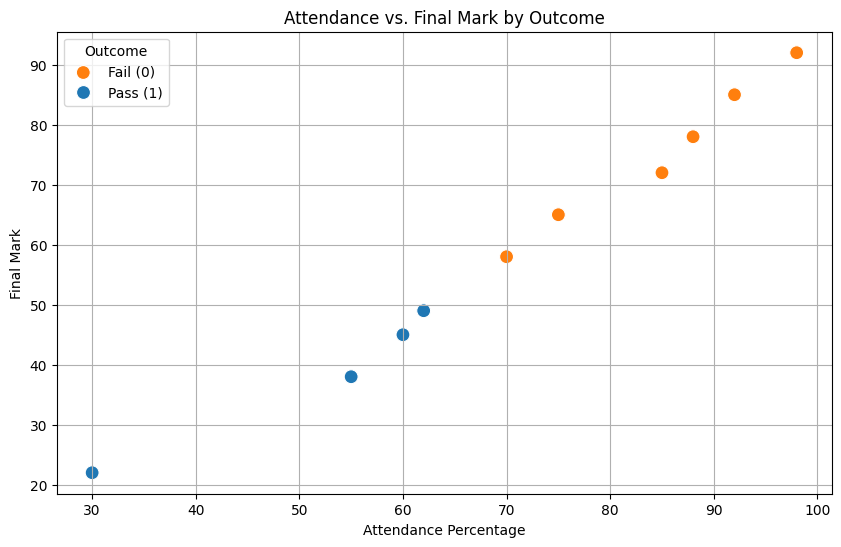


--- Insights ---
This plot clearly shows a strong relationship between attendance, marks, and outcomes.

1. Students who failed (blue dots) are all clustered in the bottom-left corner,
   representing low attendance and low marks.
2. Students who passed (orange dots) are in the top-right, with high
   attendance and high marks.
3. This visually confirms that attendance and marks are strong predictors
   of a student's pass/fail status, which supports our model's findings.



In [7]:
# --- 6. VISUALIZATION AND INSIGHTS ---

print("\n--- Visualization: Attendance vs. Marks ---")

plt.figure(figsize=(10, 6))

# Create a scatter plot
# x-axis is attendance, y-axis is marks
# 'hue' colors the dots based on whether they Passed (1) or Failed (0)
sns.scatterplot(data=df, x='attendance_percent', y='final_mark', hue='pass_fail', s=100)

plt.title('Attendance vs. Final Mark by Outcome')
plt.xlabel('Attendance Percentage')
plt.ylabel('Final Mark')
plt.legend(title='Outcome', loc='upper left', labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

# --- 7. Interpretation (as required by the prompt) ---
print(
"""
--- Insights ---
This plot clearly shows a strong relationship between attendance, marks, and outcomes.

1. Students who failed (blue dots) are all clustered in the bottom-left corner,
   representing low attendance and low marks.
2. Students who passed (orange dots) are in the top-right, with high
   attendance and high marks.
3. This visually confirms that attendance and marks are strong predictors
   of a student's pass/fail status, which supports our model's findings.
"""
)